In [90]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

In [91]:
data=pd.read_excel("C:/Users/Jitesh Chandani/Desktop/BankReviews.xlsx")

In [92]:
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [93]:
data = data[['Stars','Reviews']]

In [94]:
data

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...
...,...,...
500,1,_x000D_\nI never write reviews but had to this...
501,1,_x000D_\nIt all started when Bob G ran a credi...
502,1,_x000D_\nWhat a horrible experience. We have e...
503,1,"_x000D_\nRep was extremely professional, frien..."


In [95]:
data.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


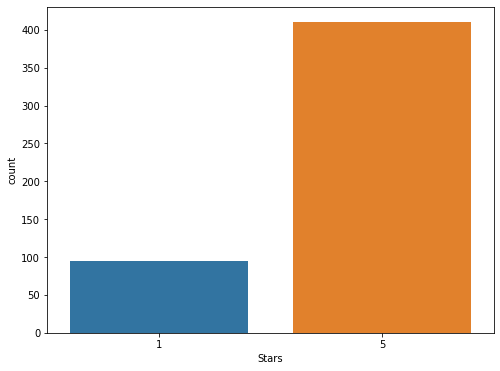

In [96]:
plt.figure(figsize=(8,6))
sns.countplot(data.Stars)
plt.show()

# Classification of Reviews into Positive, Negative and Neutral

In [97]:
data['sentiment'] = data["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [98]:
data

,Stars,Reviews,sentiment
0,5,"Great job, Wyndham Capital! Each person was pr...",0.533333
1,5,Matthew Richardson is professional and helpful...,0.453333
2,5,We had a past experience with Wyndham Mortgage...,-0.033231
3,5,We have been dealing with Brad Thomka from the...,0.093740
4,5,I can't express how grateful I am for the supp...,0.125000
...,...,...,...
500,1,_x000D_\nI never write reviews but had to this...,0.110105
501,1,_x000D_\nIt all started when Bob G ran a credi...,0.094792
502,1,_x000D_\nWhat a horrible experience. We have e...,0.046471
503,1,"_x000D_\nRep was extremely professional, frien...",0.161957


In [99]:
def sentiment_review(x):
    if x > 0:
        return 'Positive'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [100]:
data['Type'] = data['sentiment'].apply(sentiment_review )

In [101]:
data

,Stars,Reviews,sentiment,Type
0,5,"Great job, Wyndham Capital! Each person was pr...",0.533333,Positive
1,5,Matthew Richardson is professional and helpful...,0.453333,Positive
2,5,We had a past experience with Wyndham Mortgage...,-0.033231,Negative
3,5,We have been dealing with Brad Thomka from the...,0.093740,Positive
4,5,I can't express how grateful I am for the supp...,0.125000,Positive
...,...,...,...,...
500,1,_x000D_\nI never write reviews but had to this...,0.110105,Positive
501,1,_x000D_\nIt all started when Bob G ran a credi...,0.094792,Positive
502,1,_x000D_\nWhat a horrible experience. We have e...,0.046471,Positive
503,1,"_x000D_\nRep was extremely professional, frien...",0.161957,Positive


In [102]:
data.Type.value_counts()

Positive    466
Negative     34
Neutral       5
Name: Type, dtype: int64

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


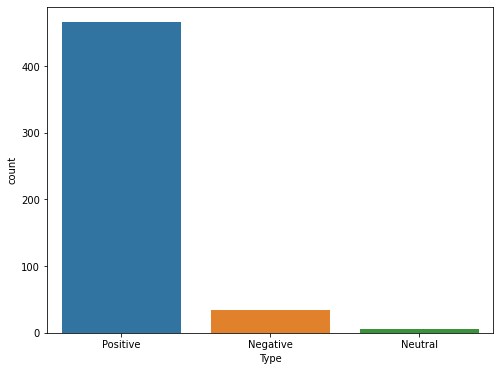

In [103]:
plt.figure(figsize=(8,6))
sns.countplot(data.Type)
plt.show()

In [104]:
data[(data.Type == 'Positive')]

,Stars,Reviews,sentiment,Type
0,5,"Great job, Wyndham Capital! Each person was pr...",0.533333,Positive
1,5,Matthew Richardson is professional and helpful...,0.453333,Positive
3,5,We have been dealing with Brad Thomka from the...,0.093740,Positive
4,5,I can't express how grateful I am for the supp...,0.125000,Positive
5,5,I had the pleasure of working with Wyndham Cap...,0.345833,Positive
...,...,...,...,...
500,1,_x000D_\nI never write reviews but had to this...,0.110105,Positive
501,1,_x000D_\nIt all started when Bob G ran a credi...,0.094792,Positive
502,1,_x000D_\nWhat a horrible experience. We have e...,0.046471,Positive
503,1,"_x000D_\nRep was extremely professional, frien...",0.161957,Positive


In [105]:
data[(data.Type == 'Negative')].head()

,Stars,Reviews,sentiment,Type
2,5,We had a past experience with Wyndham Mortgage...,-0.033231,Negative
17,1,This was the worst experience ever. It was lik...,-0.038864,Negative
39,1,The closing process for a VA loan went smoothl...,-0.010417,Negative
40,1,Miserable experience. They screwed up everythi...,-0.343434,Negative
44,1,This Lender contacted my previous phone number...,-0.205556,Negative


In [106]:
data[(data.Type == 'Neutral')].head()

,Stars,Reviews,sentiment,Type
97,1,_x000D_\nPerson with whom I spoke kept interru...,0.0,Neutral
234,1,"_x000D_\nThey increased my rate, quoted me dif...",0.0,Neutral
236,1,_x000D_\nThe rate re-lock-in rule was not foll...,0.0,Neutral
408,1,_x000D_\nLending tree matching me up with comp...,0.0,Neutral
417,1,_x000D_\nThey called me and asked about the ci...,0.0,Neutral


# Most Frequent Positive and Negative Words

In [107]:
# create a new DataFrame that only contains the 5-star and 1-star reviews

# define X and y
X = data.Reviews
y = data.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [108]:
# Creating Corpus
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [109]:
stop = set(nltk.corpus.stopwords.words('english'))

In [110]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [111]:
import re 
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [112]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [113]:
# Vectorization (Count, Tfidf)
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

In [114]:
#View the DTM
dtm=xtrain_count.toarray()

In [115]:
dtm

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
count_vect.get_feature_names()

['aaron',
 'able',
 'absolutely',
 'accept',
 'account',
 'accurate',
 'across',
 'actual',
 'adam',
 'additional',
 'advice',
 'agent',
 'agreed',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'amount',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraise',
 'appreciate',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspects',
 'assurance',
 'attention',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'balance',
 'bank',
 'banks',
 'based',
 'became',
 'beginning',
 'beneficial',
 'bent',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'broker',
 'business',
 'buy',
 'buyer',
 'buyers',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calls',
 'calm',
 'came',
 'can',
 'cannot',
 'capital',
 'care',
 'cases',
 'causing',
 'certainly',
 'change',
 'changed',
 'check',
 'chose',
 'chris',
 'circumstances',
 'clear',
 'clients',
 'c

In [117]:
dtm1=pd.DataFrame(dtm)

In [118]:
dtm1.columns=count_vect.get_feature_names()

In [119]:
dtm1.head()

,aaron,able,absolutely,accept,account,accurate,across,actual,adam,additional,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_dataframe = pd.DataFrame(np.sum(dtm,axis=0),count_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

In [121]:
count_dtm_dataframe

,Word,Count
0,aaron,16
1,able,35
2,absolutely,10
3,accept,6
4,account,12
...,...,...
582,wrong,7
583,wyndham,13
584,year,9
585,years,29


In [122]:
#adding sentiment column which shows sentiment polarity of each word
count_dtm_dataframe['sentiment'] = count_dtm_dataframe["Word"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [123]:
count_dtm_dataframe

,Word,Count,sentiment
0,aaron,16,0.0
1,able,35,0.5
2,absolutely,10,0.2
3,accept,6,0.0
4,account,12,0.0
...,...,...,...
582,wrong,7,-0.5
583,wyndham,13,0.0
584,year,9,0.0
585,years,29,0.0


In [124]:
def sentiment_review_1(x):
    if x > 0:
        return 'Positive'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [125]:
count_dtm_dataframe['Type'] = count_dtm_dataframe['sentiment'].apply(sentiment_review )

In [126]:
count_dtm_dataframe

,Word,Count,sentiment,Type
0,aaron,16,0.0,Neutral
1,able,35,0.5,Positive
2,absolutely,10,0.2,Positive
3,accept,6,0.0,Neutral
4,account,12,0.0,Neutral
...,...,...,...,...
582,wrong,7,-0.5,Negative
583,wyndham,13,0.0,Neutral
584,year,9,0.0,Neutral
585,years,29,0.0,Neutral


In [127]:
count_dtm_dataframe.drop('sentiment', axis = 1, inplace = True)

In [128]:
count_dtm_dataframe

,Word,Count,Type
0,aaron,16,Neutral
1,able,35,Positive
2,absolutely,10,Positive
3,accept,6,Neutral
4,account,12,Neutral
...,...,...,...
582,wrong,7,Negative
583,wyndham,13,Neutral
584,year,9,Neutral
585,years,29,Neutral


In [129]:
# separating positive words
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Type']=='Positive',:].sort_values('Count',ascending=False)

In [130]:
positive_words_df.head(5)

,Word,Count,Type
224,great,109,Positive
56,best,74,Positive
199,first,59,Positive
400,professional,57,Positive
240,highly,51,Positive


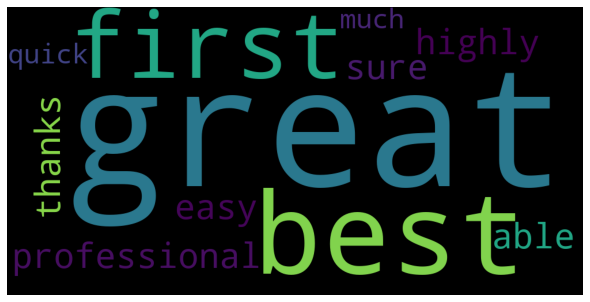

In [131]:
# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [132]:
# separating negative words
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Type']=='Negative',:].sort_values('Count',ascending=False)
negative_words_df.head(5)

,Word,Count,Type
90,closed,48,Negative
180,extremely,35,Negative
232,hard,32,Negative
387,poor,21,Negative
291,less,15,Negative


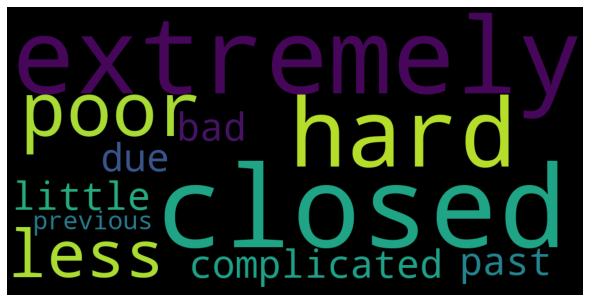

In [133]:
# plotting word cloud of 10 most frequently used negative words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Topic Modelling

In [134]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_tfidf = tfidf_vect.transform(X_test)

In [138]:
# Importing Gensim
import gensim
from gensim import corpora

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [156]:
X_train_tokens = [doc.split() for doc in X_train]  

In [140]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary(2192 unique tokens: ['accept', 'agreed', 'already', 'also', 'asking']...)


In [158]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [142]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [152]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary,passes=1)

In [153]:
print(ldamodel.print_topics(num_topics=10, num_words=50))

[(0, '0.012*"great" + 0.012*"us" + 0.012*"process" + 0.010*"closing" + 0.010*"work" + 0.009*"team" + 0.008*"loan" + 0.008*"would" + 0.008*"got" + 0.007*"read" + 0.007*"home" + 0.006*"best" + 0.006*"time" + 0.006*"first" + 0.005*"made" + 0.005*"triumph" + 0.005*"done" + 0.005*"experience" + 0.005*"recommend" + 0.005*"even" + 0.005*"sent" + 0.005*"professional" + 0.004*"naso" + 0.004*"bank" + 0.004*"every" + 0.004*"weeks" + 0.004*"never" + 0.004*"get" + 0.004*"service" + 0.004*"business" + 0.004*"questions" + 0.004*"mr" + 0.004*"day" + 0.004*"company" + 0.003*"couldn" + 0.003*"lender" + 0.003*"said" + 0.003*"mortgage" + 0.003*"anyone" + 0.003*"easy" + 0.003*"make" + 0.003*"email" + 0.003*"customer" + 0.003*"well" + 0.003*"credit" + 0.003*"knowledgeable" + 0.003*"went" + 0.003*"letter" + 0.003*"could" + 0.003*"responsive"'), (1, '0.009*"home" + 0.008*"loan" + 0.008*"worked" + 0.007*"read" + 0.006*"able" + 0.006*"information" + 0.006*"closing" + 0.006*"process" + 0.006*"us" + 0.005*"recomm

In [154]:
topics = ldamodel.show_topics(formatted=False, num_words=100)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,100))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 100 words:
great us process closing work team loan would got read home best time first made triumph done experience recommend even sent professional naso bank every weeks never get service business questions mr day company couldn lender said mortgage anyone easy make email customer well credit knowledgeable went letter could responsive steve another peter everything answered things thank payments chris stephanie flex called sure pleasure rate working two lending various years want prompt took close worked deal use interest buying reactor give bob care told later good going house check despite account highly phone needed provide way didn communication in also

Topic 2, top 100 words:
home loan worked read able information closing process us recommend documents work lender call team hard close would everyone issues helped experience phone company could went highly throughout go financing know pleasure didn needs person end get closed easy working day anthony that responsive

# Predicting Star Ratings using Reviews

In [159]:
# Building Model on TDM
# building naive bayes model on TDM
naive_model = MultinomialNB()
naive_model.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
predict_train = naive_model.predict(X_train_tfidf)
predict_test = naive_model.predict(X_test_tfidf)

In [163]:
print('Accuracy on train: ',metrics.accuracy_score(y_train,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(y_test,predict_test))

Accuracy on train:  0.9470899470899471
Accuracy on test:  0.889763779527559


In [164]:
# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(X_train_tfidf)[:,1]
predict_prob_test = naive_model.predict_proba(X_test_tfidf)[:,1]

In [165]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(y_train,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(y_test,predict_prob_test))

ROC_AUC score on train:  0.9891233766233767
ROC_AUC score on test:  0.9811764705882353


In [166]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(y_test,predict_test,[5,1])
cm_test

array([[102,   0],
       [ 14,  11]], dtype=int64)

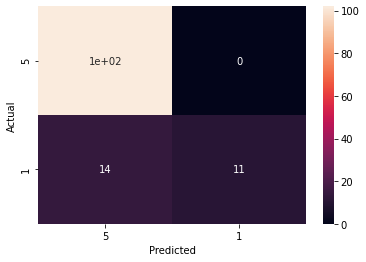

In [167]:
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [171]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
#Evalution of train and test accuracy
from sklearn import metrics

train_accuracy=metrics.accuracy_score(y_train,logreg.predict(X_train_tfidf))
print('train_accuracy: ',train_accuracy)

test_accuracy=metrics.accuracy_score(y_test,logreg.predict(X_test_tfidf))
print('test_accuracy: ',test_accuracy)

train_accuracy:  0.9074074074074074
test_accuracy:  0.8661417322834646


Text(0.5, 15.0, 'Predicted label')

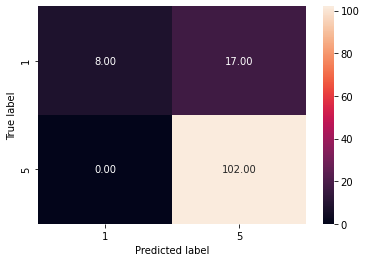

In [174]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,
                            logreg.predict(X_test_tfidf), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Customer satisfaction with the reviews is best predicted by Naive Baye's model.